<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_ml/ml13_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# Data

Fruits 360 dataset: https://www.kaggle.com/moltean/fruits

In [3]:
# jupyter notebook에서 shell 명령어(linux 명령어) 실행
!wget https://bit.ly/fruits_300 -O fruits_300.npy
# 웹주소(https://...)에 있는 파일을 다운로드해서 파일(fruits_300.npy)로 저장

--2021-03-22 02:12:00--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-03-22 02:12:00--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-03-22 02:12:00--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [4]:
# 파일을 읽어서 numpy 배열을 리턴
fruits = np.load('fruits_300.npy')

In [5]:
fruits.shape  #> (n_samples, height, width), 100x100 크기의 흑백 이미지 300개.

(300, 100, 100)

## 데이터 시각화

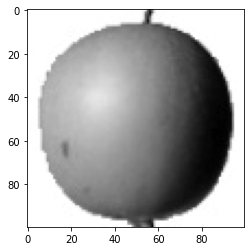

In [9]:
# 첫번째 이미지 시각화
plt.imshow(fruits[0], cmap=plt.cm.binary)
plt.show()

In [21]:
np.ceil(10), np.ceil(10.1)

(10.0, 11.0)

In [39]:
def plot_fruit(images):
    """한줄에 최대10개의 이미지를 출력. 줄의 개수는 이미지의 개수에 따라서 결정.
    """
    n = len(images)  # 이미지 개수
    cols = 10  # 한줄에 출력할 이미지 개수
    rows = int(np.ceil(n / cols))  # 이미지를 출력할 줄(행)의 개수 <- 배열의 인덱스는 정수여야 하기 때문에
    # 이미지를 출력할 행/열의 개수만큼 subplot을 생성
    # figsize=(width, height)
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols, rows))
    for i in range(rows):  # 행의 개수만큼 반복
        for j in range(cols):  # 열의 개수만큼 반복
            img_idx = i * 10 + j
            if rows == 1:  # 행의 개수가 1인 경우, subplot은 1차원 배열!
                if img_idx < n:  # 이미지가 있는 인덱스에 대해서만 이미지 출력.
                    axes[img_idx].imshow(images[img_idx], cmap=plt.cm.binary)
                axes[img_idx].axis('off')
            else:
                if img_idx < n:  # 이미지가 있는 인덱스에 대해서만 이미지 출력.
                    axes[i, j].imshow(images[img_idx], cmap=plt.cm.binary)
                axes[i, j].axis('off')

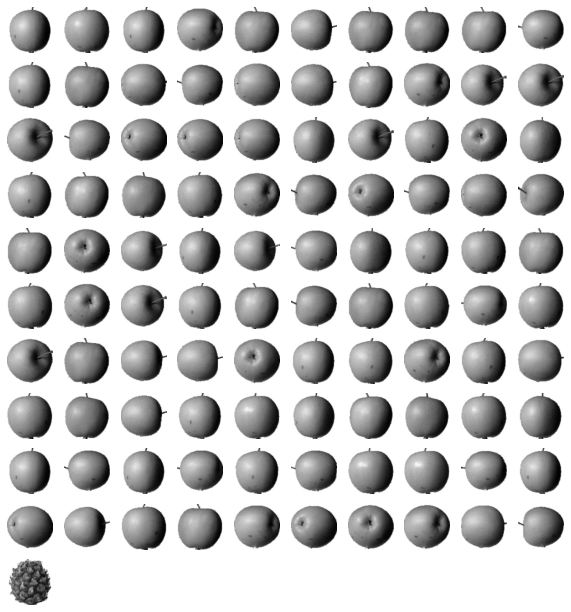

In [44]:
plot_fruit(fruits[0:101])
plt.show()

# 이미지 픽셀 분석

In [45]:
fruits.shape

(300, 100, 100)

In [46]:
apples = fruits[0:100].reshape((100, 100*100))  
#> (100, 100, 100) 모양의 3차원 배여을 (100, 10_000) 모양의 2차원 배열로 변환
apples.shape

(100, 10000)

In [47]:
pineapples = fruits[100:200].reshape((100, 100*100))
bananas = fruits[200:300].reshape((100, 100*100))

## 각각의 이미지의 모든 픽셀(100x100 픽셀)의 평균

In [48]:
apples_mean = np.mean(apples, axis=1)  #> (100,) 모양의 1차원 배열
apples_mean

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

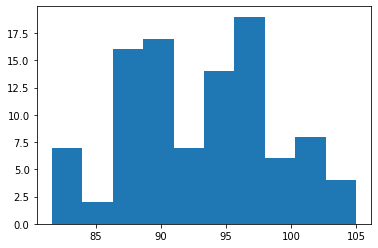

In [49]:
# 사과 이미지의 (100x100개) 픽셀들의 평균 분포
plt.hist(apples_mean)
plt.show()

In [50]:
pineapples_mean = np.mean(pineapples, axis=1)
bananas_mean = np.mean(bananas, axis=1)

In [51]:
pineapples_mean.shape, bananas_mean.shape

((100,), (100,))

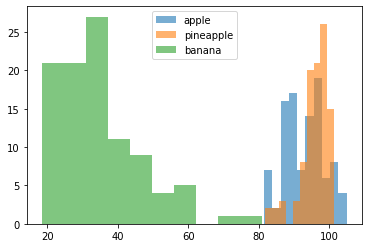

In [52]:
plt.hist(apples_mean, alpha=0.6, label='apple')
plt.hist(pineapples_mean, alpha=0.6, label='pineapple')
plt.hist(bananas_mean, alpha=0.6, label='banana')

plt.legend()
plt.show()

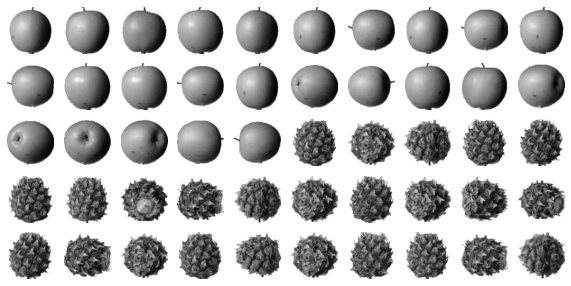

In [54]:
plot_fruit(fruits[75:125])